In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

# Import API key
#from api_keys import api_key

# Import 2017 and 2009 dataframes
raw_2017 = pd.DataFrame(pd.read_csv("Cleaned_2017_data.csv"))
raw_2009 = pd.DataFrame(pd.read_csv("Cleaned_2009_data.csv"))
merged_df = raw_2017.merge(raw_2009[["UNITID", "GRAD_DEBT_MDN", "MD_EARN_WNE_P10"]], how="left", on = "UNITID")

In [2]:
merged_df.head(10)

,UNITID,INSTNM,CITY,STABBR,ZIP,MAIN,PREDDEG,HIGHDEG,CONTROL,REGION,...,COSTT4_A,COSTT4_P,RET_FT4,COMPL_RPY_1YR_RT,COMPL_RPY_3YR_RT,COMPL_RPY_5YR_RT,COMPL_RPY_7YR_RT,GRAD_DEBT_MDN_x,GRAD_DEBT_MDN_y,MD_EARN_WNE_P10
0,100654,Alabama A & M University,Normal,AL,35762,1,3,4,1,5,...,22667.0,NaN,0.5769,NaN,0.429326288,0.511318242,0.563870968,32750,22666.5,32600
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,1,3,4,1,5,...,22684.0,NaN,0.8161,NaN,0.618270079,0.673330083,0.74059293,21833,14500,42800
2,100690,Amridge University,Montgomery,AL,36117-3553,1,3,4,2,5,...,13380.0,NaN,0.0909,NaN,0.43902439,0.550724638,0.679245283,22890,15500,39000
3,100706,University of Alabama in Huntsville,Huntsville,AL,35899,1,3,4,1,5,...,22059.0,NaN,0.8255,NaN,0.680887372,0.742248062,0.816953317,22647,16500,48300
4,100724,Alabama State University,Montgomery,AL,36104-0271,1,3,4,1,5,...,19242.0,NaN,0.6262,NaN,0.366037736,0.442307692,0.491967872,31500,24728,27600
5,100751,The University of Alabama,Tuscaloosa,AL,35487-0166,1,3,4,1,5,...,28422.0,NaN,0.8627,NaN,0.711801242,0.758552446,0.804500703,23290,17500,43100
6,100760,Central Alabama Community College,Alexander City,AL,35010,1,2,2,1,5,...,13868.0,NaN,NaN,NaN,0.325,0.53125,0.5,9500,9400,28000
7,100812,Athens State University,Athens,AL,35611,1,3,3,1,5,...,NaN,NaN,NaN,NaN,0.601984565,0.609341826,0.701265823,18000,16000,42100
8,100830,Auburn University at Montgomery,Montgomery,AL,36117-3596,1,3,4,1,5,...,19255.0,NaN,0.6667,NaN,0.634180791,0.701754386,0.711256118,23363,15878,36100
9,100858,Auburn University,Auburn,AL,36849,1,3,4,1,5,...,29794.0,NaN,0.9101,NaN,0.810957758,0.804597701,0.843283582,21500,PrivacySuppressed,47700


In [26]:
#Create 
test_df = merged_df.sample(n=200)
test_df = test_df.reset_index()
test_df.head()

,index,UNITID,INSTNM,CITY,STABBR,ZIP,MAIN,PREDDEG,HIGHDEG,CONTROL,...,COSTT4_A,COSTT4_P,RET_FT4,COMPL_RPY_1YR_RT,COMPL_RPY_3YR_RT,COMPL_RPY_5YR_RT,COMPL_RPY_7YR_RT,GRAD_DEBT_MDN_x,GRAD_DEBT_MDN_y,MD_EARN_WNE_P10
0,5551,454227,Chamberlain University-Illinois,Addison,IL,60101,1,3,4,3,...,28372.0,NaN,0.8667,NaN,0.664635694,0.737939493,PrivacySuppressed,22893.5,PrivacySuppressed,56600
1,1982,179715,North Central Missouri College,Trenton,MO,64683,1,2,2,1,...,14132.0,NaN,NaN,NaN,0.610644258,0.727969349,0.694214876,10500,8853,30200
2,2539,198561,Gardner-Webb University,Boiling Springs,NC,28017-0997,1,3,4,2,...,41020.0,NaN,0.6652,NaN,0.591050989,0.672340426,0.730603448,24750,18375,38600
3,2596,199485,Rockingham Community College,Wentworth,NC,27375-0038,1,2,2,1,...,11540.0,NaN,NaN,NaN,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,27100
4,4396,383792,Houston Training School-Gulfgate,Houston,TX,77087,0,1,1,3,...,NaN,9321.0,NaN,NaN,NaN,NaN,NaN,PrivacySuppressed,NaN,16600


In [27]:
#Convert PrivacySuppressed tags to NaN values
for index, row in test_df.iterrows():
    column = 0
    for cell in row:
        if cell == "PrivacySuppressed":
            test_df.iloc[index, column] = np.nan
        column += 1

In [28]:
#Convert the data columns to floats
for column in test_df.columns[10:]:
    test_df[column] = pd.to_numeric(test_df[column])
test_df.dtypes

index                 int64
UNITID                int64
INSTNM               object
CITY                 object
STABBR               object
ZIP                  object
MAIN                  int64
PREDDEG               int64
HIGHDEG               int64
CONTROL               int64
REGION                int64
LOCALE              float64
LOCALE2             float64
LATITUDE            float64
LONGITUDE           float64
CCUGPROF            float64
ADM_RATE            float64
NPT4_PUB            float64
NPT4_PRIV           float64
COSTT4_A            float64
COSTT4_P            float64
RET_FT4             float64
COMPL_RPY_1YR_RT    float64
COMPL_RPY_3YR_RT    float64
COMPL_RPY_5YR_RT    float64
COMPL_RPY_7YR_RT    float64
GRAD_DEBT_MDN_x     float64
GRAD_DEBT_MDN_y     float64
MD_EARN_WNE_P10     float64
dtype: object

In [29]:
public_df = test_df.loc[test_df["CONTROL"]==1]
nonprofit_df = test_df.loc[test_df["CONTROL"]==2]
forprofit_df = test_df.loc[test_df["CONTROL"]==3]

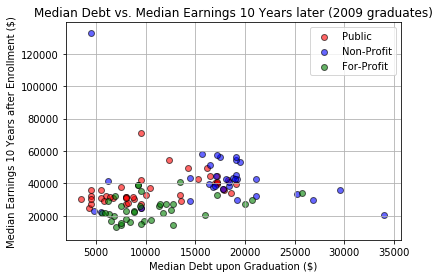

In [30]:
plt.scatter(public_df["GRAD_DEBT_MDN_y"], public_df["MD_EARN_WNE_P10"], 
           label="Public", color="r", edgecolors="k", alpha=0.6)
plt.scatter(nonprofit_df["GRAD_DEBT_MDN_y"], nonprofit_df["MD_EARN_WNE_P10"],
           label="Non-Profit", color="b", edgecolors="k", alpha=0.6)
plt.scatter(forprofit_df["GRAD_DEBT_MDN_y"], forprofit_df["MD_EARN_WNE_P10"],
           label="For-Profit", color="g", edgecolors="k", alpha=0.6)
plt.ylabel("Median Earnings 10 Years after Enrollment ($)")
plt.xlabel("Median Debt upon Graduation ($)")
plt.title("Median Debt vs. Median Earnings 10 Years later (2009 graduates)")
plt.grid()
plt.legend()